In [51]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [10]:
for each in ['movies', 'links', 'ratings', 'tags']:
    print(f'{each} - summary:')
    display(pd.read_csv(f'../data/ml-latest-small/raw/{each}.csv').info())



movies - summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


None

links - summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


None

ratings - summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


None

tags - summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


None

In [11]:

movielist=pd.read_csv('../data/ml-latest-small/raw/movies.csv')
links = pd.read_csv('../data/ml-latest-small/raw/links.csv')
ratings = pd.read_csv('../data/ml-latest-small/raw/ratings.csv')
tags = pd.read_csv('../data/ml-latest-small/raw/tags.csv')


##### What Genres info is available?

In [12]:
movielist.genres.unique()

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance',
       'Comedy|Drama|Romance', 'Comedy', 'Action|Crime|Thriller',
       'Adventure|Children', 'Action', 'Action|Adventure|Thriller',
       'Comedy|Horror', 'Adventure|Animation|Children', 'Drama',
       'Action|Adventure|Romance', 'Crime|Drama', 'Drama|Romance',
       'Action|Comedy|Crime|Drama|Thriller', 'Comedy|Crime|Thriller',
       'Crime|Drama|Horror|Mystery|Thriller', 'Drama|Sci-Fi',
       'Children|Drama', 'Adventure|Drama|Fantasy|Mystery|Sci-Fi',
       'Mystery|Sci-Fi|Thriller', 'Children|Comedy', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure|Fantasy',
       'Comedy|Drama|Thriller', 'Mystery|Thriller',
       'Animation|Children|Drama|Musical|Romance',
       'Crime|Mystery|Thriller', 'Adventure|Drama', 'Drama|Thriller',
       'Comedy|Crime', 'Action|Sci-Fi|Thriller',
       'Action|Comedy|Horror|Thriller', 'Comedy|Drama', 'Documentary',
       'Ac

In [17]:
#get all unique values of genre - check it aligns with the readme (it does)
genresSet=set('|'.join(movielist.genres.unique()).split('|'))
print(f'Genres - {len(genresSet)} values')
display(genresSet)

Genres - 20 values


{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

##### We know from the data README that some film titles have been manually entered - this might mean the release year format isn't wholly consistent...

In [20]:

movielist['film_suffix'] = movielist.title.apply(lambda x: x[-6:])
movielist.film_suffix.unique()
# can see cases where year is present but there's trailling whitespace, and other cases where year is not available

array(['(1995)', '(1994)', '(1996)', '(1976)', '(1992)', '(1967)',
       '(1993)', '(1964)', '(1977)', '(1965)', '(1982)', '(1990)',
       '(1991)', '(1989)', '(1937)', '(1940)', '(1969)', '(1981)',
       '(1973)', '(1970)', '(1955)', '(1959)', '(1968)', '(1988)',
       '(1997)', '(1972)', '(1943)', '(1952)', '(1951)', '(1957)',
       '(1961)', '(1958)', '(1954)', '(1934)', '(1944)', '(1960)',
       '(1963)', '(1942)', '(1941)', '(1953)', '(1939)', '(1950)',
       '(1946)', '(1945)', '(1938)', '(1947)', '(1935)', '(1936)',
       '(1956)', '(1949)', '(1932)', '(1975)', '(1974)', '(1971)',
       '(1979)', '(1987)', '(1986)', '(1980)', '(1978)', '(1985)',
       '(1966)', '(1962)', '(1983)', '(1984)', '(1948)', '(1933)',
       '(1931)', '(1922)', '(1998)', '(1929)', '(1930)', '(1927)',
       '(1928)', '(1999)', '(2000)', '(1926)', '(1919)', '(1921)',
       '(1925)', '(1923)', '(2001)', '(2002)', '(2003)', '(1920)',
       '(1915)', '(1924)', '(2004)', '(1916)', '(1917)', '1999

Average release year throughout dataset is 1994


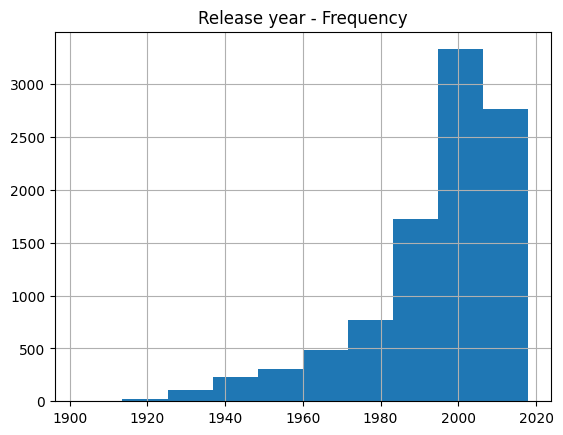

In [53]:
movielist['release_year']= movielist.title.apply(lambda x: int(x.strip()[-5:-1]) if x.strip()[-5:-1].isnumeric() else 9999)
movielist[movielist.release_year<9999].release_year.hist()
plt.title('Release year - Frequency')
# As we're focussed on similarity, we'll need to consider null replacement carefully (e.g. 9999 is very far out of range so will imapct distance metrics)
# In this case, best to replace with the average.
print(f'Average release year throughout dataset is {int(movielist[movielist.release_year<9999].release_year.mean())}')

In [60]:
 # check that we can cleanly extract film title
movielist['film_title']= movielist.title.apply(lambda x: x.strip()[:-6].strip() if x.strip()[-5:-1].isnumeric() else x)
movielist['film_title_suffix'] = movielist.film_title.apply(lambda x: x[-1])
movielist['film_title_suffix'].unique(), movielist.film_title.head(20)
# last output doesn't have ( as the last letter, so we've successful extracted the last (year) where applicable

(array(['y', 'i', 'n', 'e', 'I', 't', 'a', 'k', 'h', 'o', 'd', 's', 'r',
        ')', 'g', 'l', 'p', 'w', 'm', '3', 'b', 'c', 'A', '.', 'u', 'v',
        'f', '!', 'x', '?', '5', '2', '6', "'", 'V', 'M', 'D', '0', 'S',
        '1', '4', 'z', 'X', '7', 'Z', '9', 'K', '8', 'F', 'O', 'Q', 'é',
        'U', '*', '½', '+', ']', 'C', 'E', 'L', '²', 'R', 'P', 'í', 'W',
        'q', 'ä', 'G', 'J'], dtype=object),
 0                          Toy Story
 1                            Jumanji
 2                   Grumpier Old Men
 3                  Waiting to Exhale
 4        Father of the Bride Part II
 5                               Heat
 6                            Sabrina
 7                       Tom and Huck
 8                       Sudden Death
 9                          GoldenEye
 10           American President, The
 11       Dracula: Dead and Loving It
 12                             Balto
 13                             Nixon
 14                  Cutthroat Island
 15                  

In [62]:
for each in genresSet:
    print(f'{each} - {len(movielist[movielist.genres.str.contains(each)])}')

Animation - 611
Crime - 1199
Comedy - 3756
Children - 664
Drama - 4361
Action - 1828
Sci-Fi - 980
(no genres listed) - 34
Western - 167
War - 382
Musical - 334
Documentary - 440
Adventure - 1263
Horror - 978
Romance - 1596
Film-Noir - 87
Mystery - 573
IMAX - 158
Fantasy - 779
Thriller - 1894


C:\Users\helen\AppData\Local\Temp\ipykernel_11228\976630729.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  print(f'{each} - {len(movielist[movielist.genres.str.contains(each)])}')


C:\Users\helen\AppData\Local\Temp\ipykernel_11228\1385662560.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  genrecounts = pd.DataFrame({'Genre':genlist, 'count':[len(movielist[movielist.genres.str.contains(each)]) for each in genlist]})
C:\Users\helen\AppData\Local\Temp\ipykernel_11228\1385662560.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  plt.barh(y = genlist, width=[len(movielist[movielist.genres.str.contains(each)]) for each in genlist])


<BarContainer object of 20 artists>

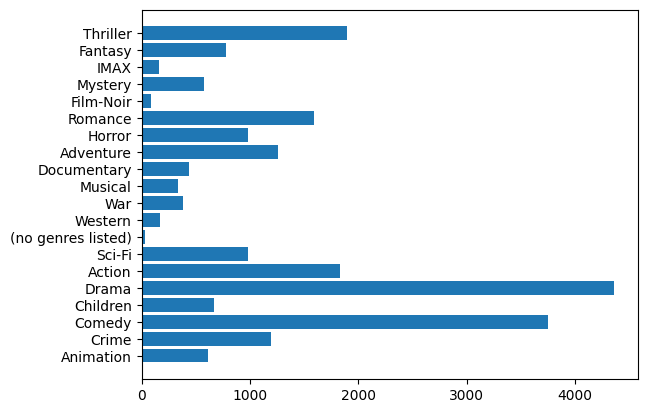

In [80]:
genlist = list(genresSet)
genrecounts = pd.DataFrame({'Genre':genlist, 'count':[len(movielist[movielist.genres.str.contains(each)]) for each in genlist]})
plt.barh(y = genlist, width=[len(movielist[movielist.genres.str.contains(each)]) for each in genlist])

In [75]:
genrecounts

,Genre,count
0,Animation,611
1,Crime,1199
2,Comedy,3756
3,Children,664
4,Drama,4361
5,Action,1828
6,Sci-Fi,980
7,(no genres listed),34
8,Western,167
9,War,382


In [72]:
genlist

['Animation',
 'Crime',
 'Comedy',
 'Children',
 'Drama',
 'Action',
 'Sci-Fi',
 '(no genres listed)',
 'Western',
 'War',
 'Musical',
 'Documentary',
 'Adventure',
 'Horror',
 'Romance',
 'Film-Noir',
 'Mystery',
 'IMAX',
 'Fantasy',
 'Thriller']

In [67]:
[len(movielist[movielist.genres.str.contains(each)]) for each in genresSet]

C:\Users\helen\AppData\Local\Temp\ipykernel_11228\786356727.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  [len(movielist[movielist.genres.str.contains(each)]) for each in genresSet]


[611,
 1199,
 3756,
 664,
 4361,
 1828,
 980,
 34,
 167,
 382,
 334,
 440,
 1263,
 978,
 1596,
 87,
 573,
 158,
 779,
 1894]